## Одномерная оптимизация методом касательных

Программа выполняет все проверки, которые были указаны в описании метода в учебнике М.Э.Аббасова
(то, что функция дифференцируема на всём заданном отрезке, нам известно, так как производная нам известна в аналитическом виде и находить её численно нам не приходится).

Программа находит точку минимума функции $e^x + \frac{1}{x}$ на отрезке [0.1; 2]

In [32]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# заданная функция
def f(x):
    return np.exp(x) + 1/x
    
# производная заданной функции
def f1(x):
    return np.exp(x) - 1/x**2
    
# границы отрезка
A = 0.1
B = 2

In [53]:
# критерий остановки
eps= 0.01

# Проверка выпуклости функции
# Функция f является выпуклой на отрезке [a, b] , если для любого alpha ∈ [0, 1] и любых x1 , x2 из [a, b] выполняется условие
# f(alpha*x1 + (1-alpha)*x2) <= alpha*f(x1) + (1-alpha)*f(x2)
discr = 0.05
Alpha = np.linspace(0, 1, int(1 / discr) + 1)
X = np.linspace(A, B, int((B - A) / discr) + 1)
convex = True
for i in range(len(Alpha)):
    for j in range(len(X)):
        for k in range(len(X)):
            alpha = Alpha[i]
            x1 = X[j]
            x2 = X[k]
            if x1 != x2 and f(alpha*x1 + (1-alpha)*x2) > alpha*f(x1) + (1-alpha)*f(x2):
                print(alpha, x1, x2)
                convex = False

if convex:
    print(f'На отрезке [{A}; {B}] функция f является выпуклой,значит метод касательных поиска минимума функции является применимым.')
else:
    print('Условие выпуклости функции f не выполняется, метод касательных неприменим.')

a = A
b = B
itera = 0
# Если f′(a) >= 0 или f′(b) <= 0, то точка a либо точка b является точкой минимума соответственно, и тогда задача решена;
# при проверке этих условий учтён также критерий остановки |f′(с)| <= epsilon
if f1(b) <= eps:  # проверка условия f′(b) <= 0 или |f′(b)| <= epsilon
    c = b
    f1c = f1(c)
else:
    c = a
    f1c = f1(a)
    if f1c < -eps:  # проверка условия, противоположного условию f′(a) >= 0 или |f′(a)| <= epsilon
        while abs(f1c) > eps:  # цикл до выполнения критерия остановки |f′(с)| <= epsilon
            c = (f(a) - f(b) + b * f1(b) - a * f1(a)) / (f1(b) - f1(a))  # х пересечения касательных
            f1c = f1(c)
            if f1c > 0:
                b = c  # Если f′(c) > 0, то для следующей итерации принимаем b = c (точка a остаётся прежней)
            else:      # иначе для следующей итерации принимаем a = c (точка b остаётся прежней)
                a = c  # Здесь не проверяется условие f′(c) = 0, вернее, условие остановки |f′(c)| <= epsilon,
                       # поскольку оно записано как условие цикла
            itera += 1

print('Точка минимума', c, 'найдена за', itera, 'итераций')
print(f'Производная в этой точке имеет значение {f1c}')
print('Значение функции f в точке минимума равно', f(c))

На отрезке [0.1; 2] функция f является выпуклой,значит метод касательных поиска минимума функции является применимым.
Точка минимума 0.7033234484936647 найдена за 10 итераций
Производная в этой точке имеет значение -0.0011183140251986856
Значение функции f в точке минимума равно 3.4422773749934557


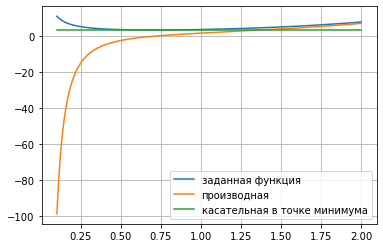

In [35]:
import matplotlib.pyplot as plt
X = np.linspace(A, B, 301)
Y = f(X)
Y1 = f1(X)
K = f(c) + f1(c) * (X - c)
plt.plot(X, Y, X, Y1, X, K)
plt.legend(['заданная функция', 'производная', 'касательная в точке минимума'])
plt.grid(True)

Посмотрим, как ведёт себя алгоритм на исходном интервале, если убрать начальную проверку на граничных точках
(проверка на выпуклость тут опущена, чтобы не дублировать одно и то же):

In [52]:
# границы отрезка
A = 0.1
B = 2

# критерий остановки
eps = 0.01

a = A
b = B
itera = 0
# Если f′(a) >= 0 или f′(b) <= 0, то точка a либо точка b является точкой минимума соответственно, и тогда задача решена;
# при проверке этих условий учтён также критерий остановки |f′(с)| <= epsilon
f1c = 2 * eps  # заведомо больше, чем epsilon, чтобы попасть в цикл
while abs(f1c) > eps:  # цикл до выполнения критерия остановки |f′(с)| <= epsilon
    c = (f(a) - f(b) + b * f1(b) - a * f1(a)) / (f1(b) - f1(a))  # абсцисса пересечения касательных
    f1c = f1(c)
    print('Итерация', itera+1, ' a =', a, ' b =', b, '  c =', c, ' f1(c) =', f1c)
    if f1c > 0:
        b = c  # Если f′(c) > 0, то для следующей итерации принимаем b = c (точка a остаётся прежней)
        print('            b = c =', c)
    else:      # иначе для следующей итерации принимаем a = c (точка b остаётся прежней)
        a = c  # Здесь не проверяется условие f′(c) = 0, вернее, условие остановки |f′(c)| <= epsilon,
               # поскольку оно записано как условие цикла
        print('            a = c =', a)
    itera += 1

print('Точка минимума', c, 'найдена за', itera, 'итераций')
print(f'Производная в этой точке имеет значение {f1c}')
print('Значение функции f в точке минимума равно', f(c))

Итерация 1  a = 0.1  b = 2   c = 0.2582543295333576  f1(c) = -13.698892503929475
            a = c = 0.2582543295333576
Итерация 2  a = 0.2582543295333576  b = 2   c = 0.7243359057341155  f1(c) = 0.15737321259105896
            b = c = 0.7243359057341155
Итерация 3  a = 0.2582543295333576  b = 0.7243359057341155   c = 0.3878876267798897  f1(c) = -5.172561445325567
            a = c = 0.3878876267798897
Итерация 4  a = 0.3878876267798897  b = 0.7243359057341155   c = 0.5118934679399325  f1(c) = -2.1478378550768618
            a = c = 0.5118934679399325
Итерация 5  a = 0.5118934679399325  b = 0.7243359057341155   c = 0.6036318176001177  f1(c) = -0.9157042826705766
            a = c = 0.6036318176001177
Итерация 6  a = 0.6036318176001177  b = 0.7243359057341155   c = 0.6599629662025643  f1(c) = -0.3612210825316371
            a = c = 0.6599629662025643
Итерация 7  a = 0.6599629662025643  b = 0.7243359057341155   c = 0.6911096210411429  f1(c) = -0.09773080832904024
            a = c = 0.69

### 2. Многомерная оптимизация (безусловная)

In [131]:
# функция
def function(x, y):
    return 3 * x ** 2 - 3 * x * y + 4 * y ** 2 - 2 * x + y 

# градиент
def gradient(x, y):
    return np.array([6 * x - 3 * y - 2, 8 * y - 3 * x + 1])

In [138]:
# функция, зависящая от альфа
def f(x0, y0, hx0, hy0, a):
    return 3 * (x0 + a * hx0) ** 2 - 3 * (x0 + a * hx0) * (y0 + a * hy0) + 4 * (y0 + a * hy0) ** 2 - 2 * (x0 + a * hx0) + 1 * (y0 + a * hy0)

# функция для поиска альфа, зависящая от параметра
def ff(a):
    return f(x0, y0, hx0, hy0, a)

In [139]:
def step_size(a, b): # с помощью метода золотого сечения
    
    a1 = a
    b1 = b
    gs1 = (3 - np.sqrt(5)) / 2
    gs2 = (np.sqrt(5) - 1) / 2
    
    while (b1 - a1) / 2 > 0.01:
        
        c1 = (b1 - a1) * gs1 + a1
        d1 = (b1 - a1) * gs2 + a1

        if ff(c1) <= ff(d1):
            b1 = d1

        elif ff(c1) > ff(d1): 
            a1 = c1
        alpha = (a1 + b1) / 2

    return alpha

In [157]:
x0, y0 = -1, 2 # задaём начальную точку
hx0, hy0 = -gradient(x0, y0) # антиградиент
k = 0 # количество шагов
steps = [] # записываем координаты шагов
steps.append([x0, y0])

# пока не выполнилось условие остановки
while np.sqrt(gradient(x0, y0)[0] ** 2 + gradient(x0, y0)[1] ** 2) > 0.01:
    
    k += 1
    
    alpha = step_size(a = 0, b = 1) # рассчитываем альфа
    
    # вычисляем x_k+1 = x_k + alpha_k * h_k
    x1 = x0 + alpha * hx0
    y1 = y0 + alpha * hy0
    
    # вычисляем антиградиент в новой точке
    hx1 = -gradient(x1, y1)[0]
    hy1 = -gradient(x1, y1)[1]
    
    # добавляем координаты нового шага
    x0 = x1
    y0 = y1
    steps.append([x0, y0])

    hx0 = hx1
    hy0 = hy1

In [165]:
print(f'k = {k} \nx1 = {x0} \nx2 = {y0} \nf* = {function(x0, y0)}')

k = 5 
x1 = 0.3333564102779849 
x2 = 0.0006282022925977414 
f* = -0.3333317966741841


Text(0.5, 0, 'x2')

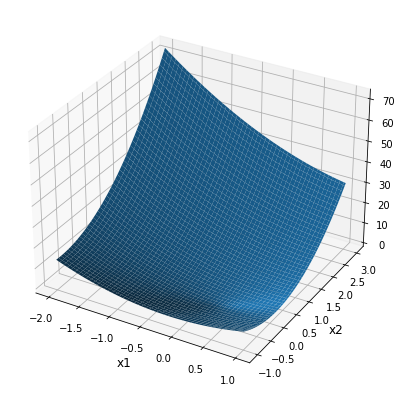

In [208]:
# изображаем функцию

fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')

x = np.linspace(-2, 1, 100)
y = np.linspace(-1, 3, 100)
x, y = np.meshgrid(x, y)
z = 3 * x ** 2 - 3 * x * y + 4 * y ** 2 - 2 * x + y

ax.plot_surface(x, y, z)
ax.set_xlabel('x1', fontsize = 12)
ax.set_ylabel('x2', fontsize = 12)

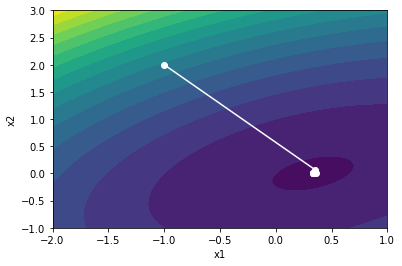

In [209]:
# изображаем траекторию спуска

fig = plt.figure()

x = np.linspace(-2, 1, 100)
y = np.linspace(-1, 3, 100)

x, y = np.meshgrid(x, y)
z = 3 * x ** 2 - 3 * x * y + 4 * y ** 2 - 2 * x + y

plt.contourf(x, y, z, 15)
plt.plot(x0, y0, 'o-', color='white')
plt.xlabel('x1')
plt.ylabel('x2')

steps = np.matrix(steps)
plt.plot(steps[:,0], steps[:,1], '-o', color='white')